# Exploratory Data Analysis on Titanic Dataset

## Step 1:Load Data set

In [ ]:

import pandas as pd 
df=pd.read_csv("Titanic-Dataset.csv")

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.isnull().sum() #  count null value in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 2: Data cleaning 

In [70]:
# Fill Age Null Values with median 
age_median=df["Age"].median()
df["Age"]=df["Age"].fillna(age_median)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# drop cabin column 
df = df.drop("Cabin", axis=1)
# Fill null of Embarked with mode 
mode_Embarked=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mode_Embarked)


In [72]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
df = df.drop(["PassengerId","Name","Ticket"], axis=1)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Step 3:Summary Statistics & Insights

In [89]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
df["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [90]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [88]:
df["Pclass"].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [97]:
df.groupby(["Pclass", "Sex"])["Sex"].count()


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64

In [ ]:

df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [100]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [101]:
df.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [103]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

In [104]:
df.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [105]:
df.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

## Step 4: Data Visualization

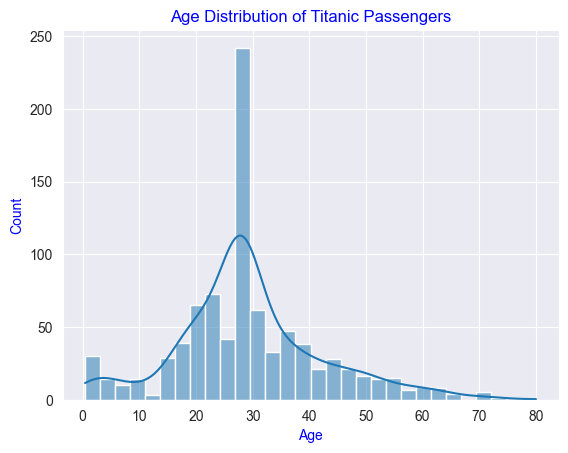

In [118]:
import seaborn as sns
import matplotlib.pyplot as pyt
sns.set_style("darkgrid")
pyt.title("Age Distribution of Titanic Passengers",color="blue")
sns.histplot(x="Age",data=df,kde=True)
pyt.xlabel("Age",color="blue")
pyt.ylabel("Count",color="blue")
pyt.show()

<Axes: title={'center': 'Number of Male and Female Passengers'}, xlabel='Sex', ylabel='count'>

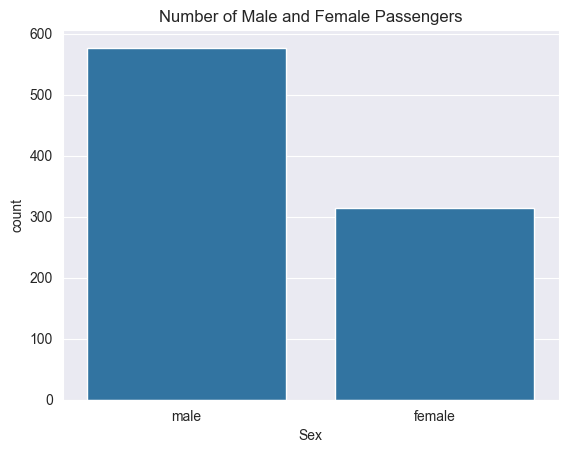

In [121]:
pyt.title("Number of Male and Female Passengers")
sns.countplot(x="Sex",data=df)

<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Sex', ylabel='Survived'>

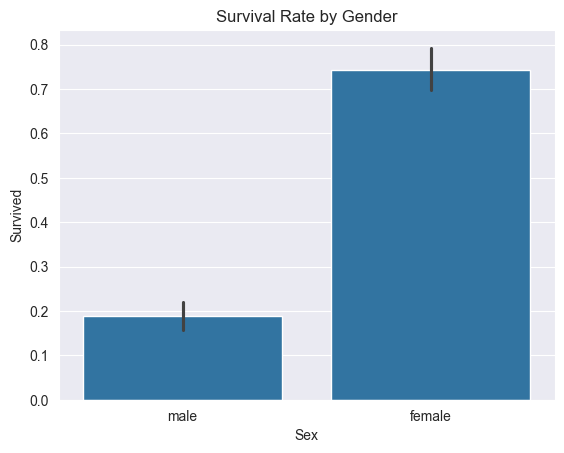

In [122]:
pyt.title("Survival Rate by Gender")
sns.barplot(x="Sex", y="Survived", data=df)

<Axes: title={'center': 'Passenger Count by Embarkation Port'}, xlabel='Embarked', ylabel='count'>

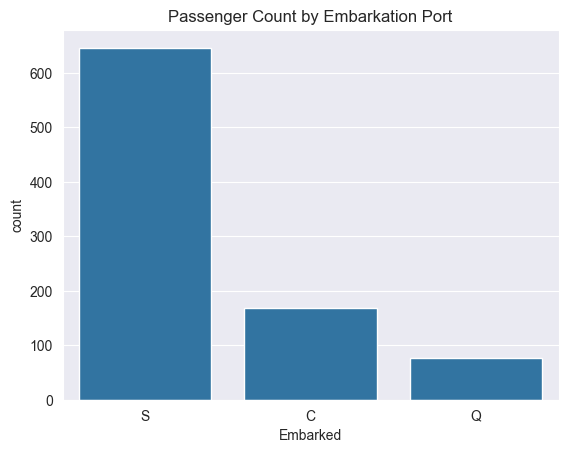

In [123]:
pyt.title("Passenger Count by Embarkation Port")
sns.countplot(x="Embarked",data=df)

<Axes: title={'center': 'Survival Rate by Embarkation Port'}, xlabel='Embarked', ylabel='Survived'>

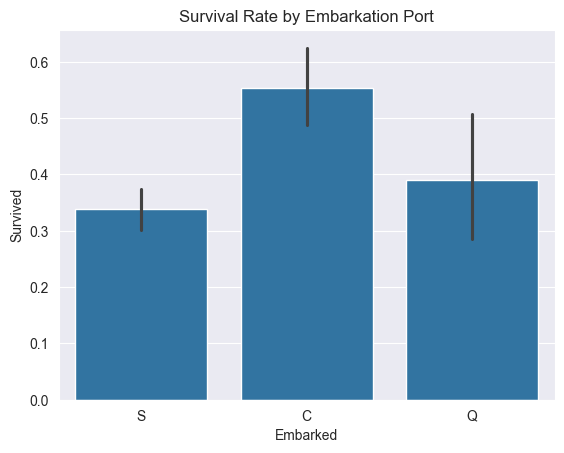

In [124]:
pyt.title("Survival Rate by Embarkation Port")
sns.barplot(x="Embarked", y="Survived", data=df)

<Axes: title={'center': 'Survival Rate by Class'}, xlabel='Pclass', ylabel='Survived'>

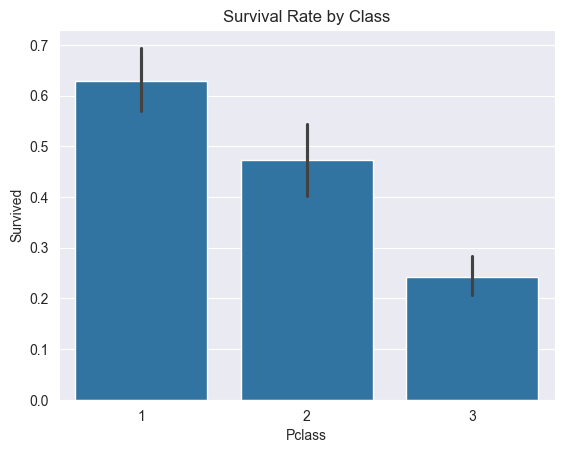

In [126]:
pyt.title("Survival Rate by Class")
sns.barplot(x="Pclass", y="Survived", data=df)

Text(0.5, 1.0, 'Age Distribution by Gender')

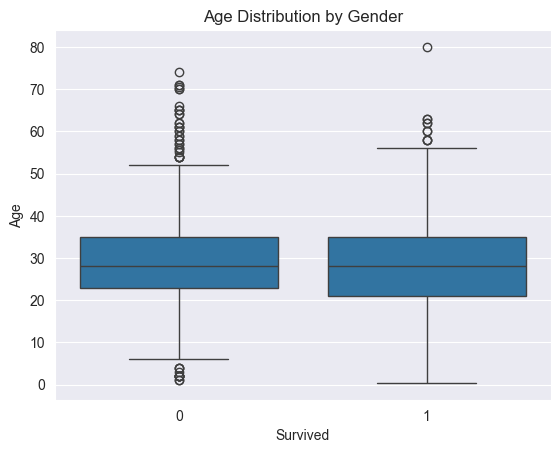

In [132]:
sns.boxplot(x="Survived",y="Age",data=df)
pyt.title("Age Distribution by Gender")

Text(0.5, 1.0, 'Fare Distribution Across Passenger Classes')

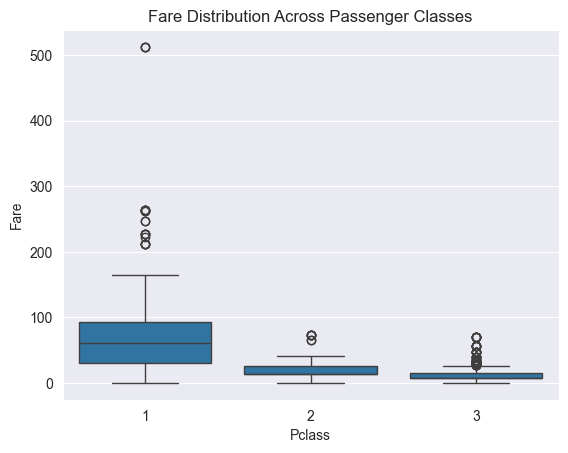

In [134]:
sns.boxplot(x="Pclass", y="Fare", data=df)
pyt.title("Fare Distribution Across Passenger Classes")

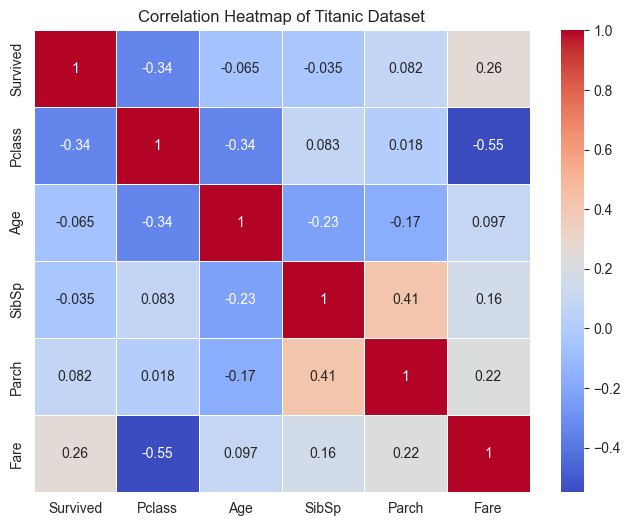

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [138]:
df.to_csv("Clean_Titanic_Data_Set.csv")